In [1]:
import perda

In [2]:
csvPath = "[Practice Endurance] 05_25_23 09_39_05 PM.csv"
aly = perda.create()

Analyzer Created


In [3]:
aly.reset()

Reset Analyzer


In [4]:
aly.read_csv(csvPath)

Reset Analyzer
Reading file: PER CSV Modbus Log 05/25/23 09:39:05 PM



Processing CSV: 1lines [00:00, ?lines/s]

Processing CSV: 17791117lines [00:33, 523652.75lines/s]


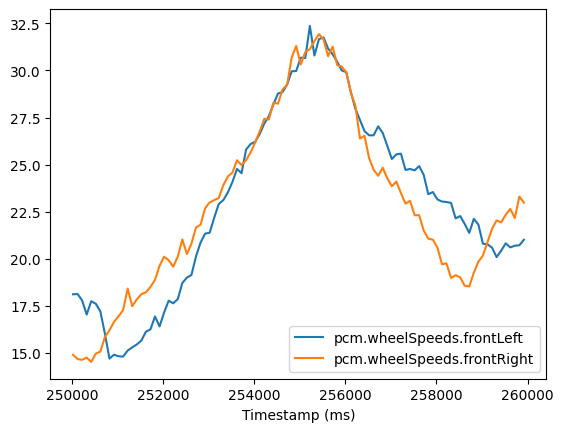

In [5]:
variables = [
    "pcm.wheelSpeeds.frontLeft",
    "pcm.wheelSpeeds.frontRight"
]

aly.set_plot(start_time = 250000, end_time = 260000, unit = "ms")
aly.plot(variables)

In [11]:
print(aly.__plot_end_time)

AttributeError: 'analyzer' object has no attribute '__plot_end_time'